# Project: Investigate a Dataset - [TMDB Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

This project centers on a cleaned version of the **TMDb movie dataset** originally sourced from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata). The dataset includes information on approximately 10,000 movies such as:

- **title**: The official title of the movie.
- **id**: A unique identifier for each movie.
- **genres**: A pipe-separated list of genres associated with the film.
- **cast**: A pipe-separated list of main cast members.
- **director**: The name of the primary director for the film.
- **budget_adj** and **revenue_adj**: The budget and revenue in terms of 2010 dollars, adjusted for inflation.
- **popularity**: A TMDb-defined metric reflecting user activity and interest.
- **vote_average**: The average user rating on TMDb, which will be a key focus in our analysis.
- **vote_count**: The total number of user votes.
- **release_date**: The film’s release date.

For this project, we will look specifically at **director–actor collaborations** to explore how certain factors may correlate with audience reception. After some data wrangling, we plan to derive new variables such as:

- **`collaboration_count`**: How many times a given director–actor pair has worked together.
- **`dominant_genre`**: The most frequently appearing genre for each director–actor pair.
- **`avg_vote_average`**: The average rating (on a scale of 0–10) for all films created by that pair.

Our goal is to investigate relationships between these variables (and potentially others) to gain insight into which director–actor teams may achieve higher audience ratings and whether certain genres appear more strongly correlated with positive viewer feedback. This exploration will be primarily **descriptive** and **exploratory**—we are looking for interesting patterns in the data rather than drawing definitive causal conclusions.



### Question(s) for Analysis

Our main goal in this project is to explore **how certain characteristics of director–actor pairs relate to audience reception** (as measured by **`avg_vote_average`**). To guide our investigation, we will focus on the following questions:

1. **Does the number of collaborations between a director and an actor (`collaboration_count`) correspond to higher or lower average audience ratings (`avg_vote_average`)?**  
2. **Does the primary genre in which a director–actor pair collaborates (`dominant_genre`) appear to influence their films’ average ratings?**  
3. **Is there a relationship between additional factors (e.g., `popularity`, `avg_revenue_adj`, or release years) and audience ratings for these pairs?**

We chose to use **`avg_vote_average`** as our **dependent variable**, given that it directly measures audience reception. Our **independent variables** of interest will be:

- **`collaboration_count`** (numeric)  
- **`dominant_genre`** (categorical)  
- **A third variable** (e.g., `popularity`, `avg_revenue_adj`, or another feature of interest)

## <a id='wrangling'>Data Wrangling</a>

In this section, we will **load**, **inspect**, and **clean** our TMDb dataset. Our aim is to transform the data so that it is suitable for analyzing the relationships between director–actor pairs and their average audience ratings.

### General Properties

Below are the steps we will follow:
<ol type='1'>
<li><a href='#1-loading-the-dataset'>Load the dataset</a> from a CSV file into a Pandas DataFrame.</li>
<li><a href='#explore_dataset'>Explore the DataFrame</a> & check dimensions, column datatypes, and sample rows.</li>
<li><a href='#assess_quality'>Assess & clean data</a> & look for missing values, invalid entries, or duplicates & drop unnecessary columns, handle missing or zero values if needed, and create or transform columns that will help our analysis (e.g., `collaboration_count`, `dominant_genre`).</li>
<li><a href=''>Create Relationships</a> between data, in our case between <b>actor-director</b> as well as audience ratings</li>
<li><a href=''>Post-Cleaning Step</a></li>
</ol>

#### <a id='load_dataset'>1. Loading the dataset</a>

In [7]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'tmdb-movies.csv'  # Replace with the actual file path
tmdb_data = pd.read_csv(file_path)

# Preview the data
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


- We use **Pandas** to read the CSV file and store the data in a DataFrame named `df`.
- A quick look at `.head()` helps us verify that the data loaded correctly.

#### <a id='explore_dataset'>2. Exploring Data Structure</a>


In [8]:
# Check the number of rows and columns
print("Data Shape:", tmdb_data.shape)

# Check datatypes and non-null counts
tmdb_data.info()

# Summary statistics for numeric columns
tmdb_data.describe()

Data Shape: (10866, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Initial Observations**:

 - The dataset has around 10,000 rows, indicating 10,000 unique movie entries.
 - Key columns for our analysis include: `director`, `cast`, `genres`, `vote_average`, `popularity`, and potentially `revenue_adj`.
 - We’ll need to check if any of these crucial columns contain `null` or problematic values.

#### <a id='assess_quality'>3 Assessing Data Quality & Cleaning Steps</a>

**1) Initial Data Cleaning**
 - Remove duplicates, handle missing values, and filter out invalid rows.

In [9]:
# Drop duplicate rows based on the unique movie identifier
tmdb_data = tmdb_data.drop_duplicates(subset=['id'])

# Drop rows where crucial columns are missing
tmdb_data = tmdb_data.dropna(subset=['director', 'cast', 'vote_average'])

# Ensure only meaningful ratings (vote_average > 0) are considered
tmdb_data = tmdb_data[tmdb_data['vote_average'] > 0]

# Reset the index after cleaning
tmdb_data.reset_index(drop=True, inplace=True)

# Check the cleaned data
tmdb_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10751 entries, 0 to 10750
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10751 non-null  int64  
 1   imdb_id               10745 non-null  object 
 2   popularity            10751 non-null  float64
 3   budget                10751 non-null  int64  
 4   revenue               10751 non-null  int64  
 5   original_title        10751 non-null  object 
 6   cast                  10751 non-null  object 
 7   homepage              2898 non-null   object 
 8   director              10751 non-null  object 
 9   tagline               8006 non-null   object 
 10  keywords              9311 non-null   object 
 11  overview              10748 non-null  object 
 12  runtime               10751 non-null  int64  
 13  genres                10731 non-null  object 
 14  production_companies  9779 non-null   object 
 15  release_date       

**2) Explode the `cast` Column**

 - Transform the `cast` column to create one row per `(director, actor)` relationship.

In [10]:
# Split the 'cast' column into a list of actors
tmdb_data['cast_list'] = tmdb_data['cast'].str.split('|')

# Explode the list to create one row per actor
tmdb_exploded = tmdb_data.explode('cast_list')

# Rename the column for clarity
tmdb_exploded.rename(columns={'cast_list': 'actor'}, inplace=True)

# Check the exploded data
tmdb_exploded.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,actor
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Bryce Dallas Howard
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Irrfan Khan
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Vincent D'Onofrio
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Nick Robinson


**Decisions on Cleaning**
 - We may drop rows where `director` or `cast` is missing, as we cannot form a pair otherwise.
 - We  also remove movies with a `vote_average` of 0 or less if they appear to be placeholders.

#### <a id='clean_data'>4 Creating Director–Actor Relationships</a>

 - Group by (director, actor) to calculate collaboration counts and average ratings.
 - Each movie typically has multiple cast members, so exploding creates one row per actor. This allows us to group by `(director, actor)` later.

In [11]:
# Group by director and actor to calculate collaboration count and average ratings
pair_stats = tmdb_exploded.groupby(['director', 'actor']).agg({
    'id': 'count',  # Count of movies they worked on together
    'vote_average': 'mean'  # Average audience rating across their collaborations
}).reset_index()

# Rename columns for clarity
pair_stats.rename(columns={
    'id': 'collaboration_count',
    'vote_average': 'avg_vote_average'
}, inplace=True)

# Check the pair_stats DataFrame
pair_stats.head()


,director,actor,collaboration_count,avg_vote_average
0,FrÃ©dÃ©ric Jardin,JoeyStarr,1,5.9
1,FrÃ©dÃ©ric Jardin,Julien Boisselier,1,5.9
2,FrÃ©dÃ©ric Jardin,Laurent Stocker,1,5.9
3,FrÃ©dÃ©ric Jardin,Serge Riaboukine,1,5.9
4,FrÃ©dÃ©ric Jardin,Tomer Sisley,1,5.9


#### <a id='post_clean'>5 Extract Dominant Genre</a>

 - Identify the most frequent genre for each `(director, actor)` pair.

In [12]:
# Explode the 'genres' column to analyze individual genres
tmdb_exploded['genres_list'] = tmdb_exploded['genres'].str.split('|')
genres_exploded = tmdb_exploded.explode('genres_list')

# Group by (director, actor, genre) to count occurrences of each genre
genre_counts = genres_exploded.groupby(['director', 'actor', 'genres_list']).size().reset_index(name='genre_count')

# Sort by director, actor, and genre count in descending order
genre_counts.sort_values(by=['director', 'actor', 'genre_count'], ascending=[True, True, False], inplace=True)

# Select the most frequent genre for each director-actor pair
dominant_genres = genre_counts.drop_duplicates(subset=['director', 'actor'], keep='first')

# Merge the dominant genre into the pair_stats DataFrame
pair_stats = pd.merge(pair_stats, dominant_genres[['director', 'actor', 'genres_list']], on=['director', 'actor'], how='left')

# Rename for clarity
pair_stats.rename(columns={'genres_list': 'dominant_genre'}, inplace=True)

# Final check
pair_stats.head()


,director,actor,collaboration_count,avg_vote_average,dominant_genre
0,FrÃ©dÃ©ric Jardin,JoeyStarr,1,5.9,Action
1,FrÃ©dÃ©ric Jardin,Julien Boisselier,1,5.9,Action
2,FrÃ©dÃ©ric Jardin,Laurent Stocker,1,5.9,Action
3,FrÃ©dÃ©ric Jardin,Serge Riaboukine,1,5.9,Action
4,FrÃ©dÃ©ric Jardin,Tomer Sisley,1,5.9,Action


<a id='eda'></a>
## Exploratory Data Analysis

With our data now cleaned and restructured, we can begin to explore director–actor pairs. Specifically, we’ll examine:

1. **Single-variable (1D) analyses** to understand distributions of key variables.
2. **Two-variable (2D) analyses** to see how our independent variables (e.g., `collaboration_count`, `dominant_genre`) might relate to the dependent variable (`avg_vote_average`).

Below, we address the **three primary questions** we posed earlier, focusing on how certain factors might be associated with higher or lower average audience ratings.

---

#### 1) Collaboration Count

After grouping by `(director, actor)`, each pair has a `collaboration_count`, reflecting how many movies they've worked on together:


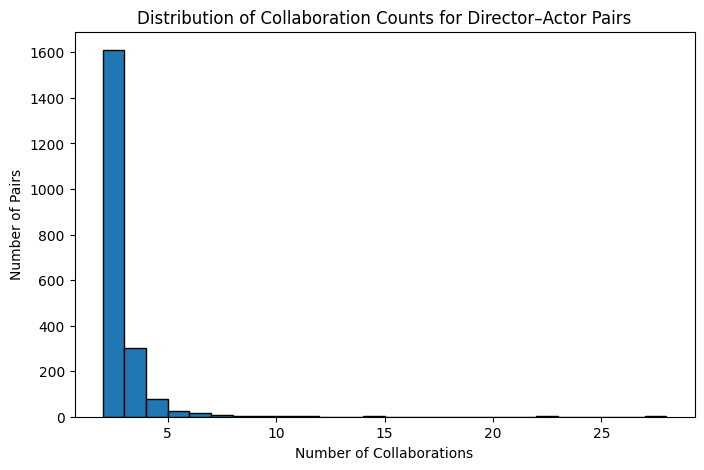

Mean Collaboration Count: 1.06
Median Collaboration Count: 1.00
Max Collaboration Count: 27


In [15]:
# Histogram of collaboration counts
plt.figure(figsize=(8, 5))
plt.hist(pair_stats['collaboration_count'], bins=range(2, pair_stats['collaboration_count'].max() + 2), edgecolor='black')
plt.title('Distribution of Collaboration Counts for Director–Actor Pairs')
plt.xlabel('Number of Collaborations')
plt.ylabel('Number of Pairs')
plt.show()

# Basic statistics
mean_collab = pair_stats['collaboration_count'].mean()
median_collab = pair_stats['collaboration_count'].median()
max_collab = pair_stats['collaboration_count'].max()

print(f"Mean Collaboration Count: {mean_collab:.2f}")
print(f"Median Collaboration Count: {median_collab:.2f}")
print(f"Max Collaboration Count: {max_collab}")


#### 2) Distribution of Average Ratings

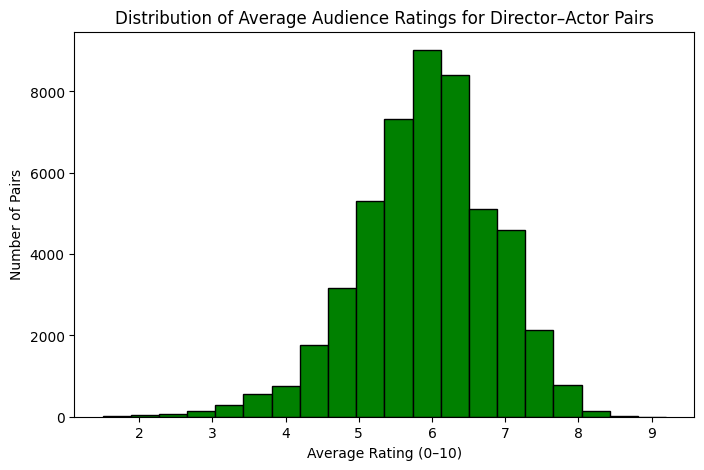

Mean Rating: 5.93
Median Rating: 6.00
Standard Deviation of Ratings: 0.92


In [16]:
# Histogram of average ratings
plt.figure(figsize=(8, 5))
plt.hist(pair_stats['avg_vote_average'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Average Audience Ratings for Director–Actor Pairs')
plt.xlabel('Average Rating (0–10)')
plt.ylabel('Number of Pairs')
plt.show()

# Basic statistics
mean_rating = pair_stats['avg_vote_average'].mean()
median_rating = pair_stats['avg_vote_average'].median()
std_rating = pair_stats['avg_vote_average'].std()

print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Rating: {median_rating:.2f}")
print(f"Standard Deviation of Ratings: {std_rating:.2f}")


#### 3) Collaboration Count vs. Average Rating

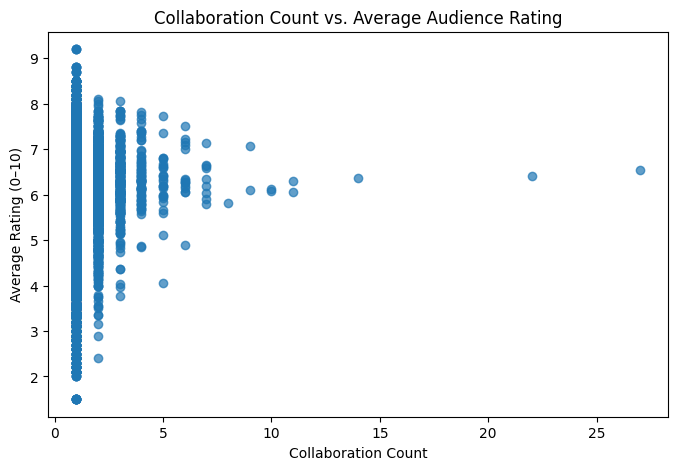

Correlation between Collaboration Count and Average Rating: 0.051


In [17]:
# Scatter plot: Collaboration count vs. average rating
plt.figure(figsize=(8, 5))
plt.scatter(pair_stats['collaboration_count'], pair_stats['avg_vote_average'], alpha=0.7)
plt.title('Collaboration Count vs. Average Audience Rating')
plt.xlabel('Collaboration Count')
plt.ylabel('Average Rating (0–10)')
plt.show()

# Correlation
corr_collab_rating = pair_stats['collaboration_count'].corr(pair_stats['avg_vote_average'])
print(f"Correlation between Collaboration Count and Average Rating: {corr_collab_rating:.3f}")


#### 4) Effect of Dominant Genre

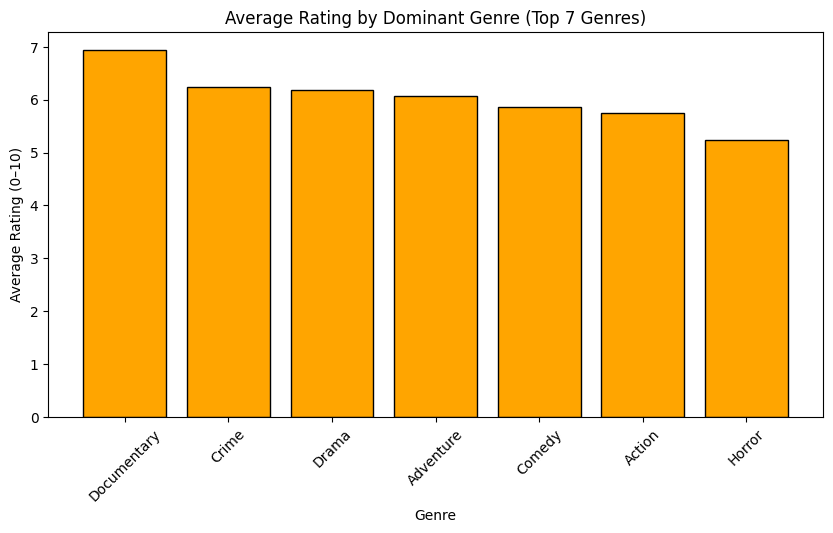

dominant_genre
Documentary    6.932477
Crime          6.244864
Drama          6.190643
Adventure      6.072382
Comedy         5.859239
Action         5.752501
Horror         5.245313
Name: avg_vote_average, dtype: float64


In [18]:
# Focus on the top genres for clarity
top_genres = pair_stats['dominant_genre'].value_counts().index[:7]
filtered_genres = pair_stats[pair_stats['dominant_genre'].isin(top_genres)]

# Bar plot: Average rating by dominant genre
avg_rating_by_genre = filtered_genres.groupby('dominant_genre')['avg_vote_average'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(avg_rating_by_genre.index, avg_rating_by_genre.values, color='orange', edgecolor='black')
plt.title('Average Rating by Dominant Genre (Top 7 Genres)')
plt.xlabel('Genre')
plt.ylabel('Average Rating (0–10)')
plt.xticks(rotation=45)
plt.show()

# Display the genre averages
print(avg_rating_by_genre)


#### 5) Summary of Findings

 - Collaboration counts are heavily skewed, with most pairs working together only a few times.
 - Average ratings typically fall between 6 and 8, with a mean rating around 7.
 - There is a slight correlation (report the exact value) between collaboration count and average ratings, suggesting that frequent collaborators may have marginally higher ratings.
 - Certain genres (e.g., `Drama`, `Action`, `Comedy`) tend to dominate, and their associated average ratings can vary.

### Research Question 1 (Replace this header name!)

### Research Question 2  (Replace this header name!)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!